# Curved Plot Example

The following notebook provides the plot for the substiytuent effect in estrone synthesis as described in the following work.

"Mechanism of a nonenzymic biogenetic-like olefinic cyclization." Paul A. Bartlett, John I. Brauman, William S. Johnson, and Robert A. Volkmann, *Journal of the American Chemical Society*, **1973**, *95*, 7502-7504. https://doi.org/10.1021/ja00803a048

You can review the synthesis of the starting material in the paper that precedes the above in the same journal. All of the reactions are ones that you have seen before.  Can you follow the steps?

"Stereospecific total synthesis of estrone via a cationic olefinic cyclization." Paul A. Bartlett and William S. Johnson, *Journal of the American Chemical Society*, **1973**, *95*, 7501-7502. https://doi.org/10.1021/ja00803a047

## Setup Tools and Read Substituent Data Table

Here the data table for Hammett substitutent constants is read in and processed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_data_location = "https://github.com/blinkletter/LFER-QSAR/blob/main/data/"
github_styles_location = "https://github.com/blinkletter/LFER-QSAR/blob/main/styles/"
github_download = "?raw=True"

#################################################################
### a function to fill in sigma for empty spaces in s+ and s- ###
#################################################################

def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)



################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

LFER_file = "LFER_HanschLeoTaft.csv"
#LFER_file = "Taft_Es_Williams.csv"

data_set = pd.read_csv(github_data_location + LFER_file + github_download,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

########################################################
### Fill across sigma values and select substituents ###
########################################################

data_set=fill_sigma(data_set)

### Remove unneeded columns
data_set.drop(labels = ["TABLE V", "TABLE I"], axis = 1, inplace = True)

data_set.sort_values(by=['sigma'], inplace=True)

#print(data_set)

## Read Experimenatl Data
Here the data from the publication is read in. It had been saved in a csv file. the data is from...

"Mechanism of a nonenzymic biogenetic-like olefinic cyclization." Paul A. Bartlett, John I. Brauman, William S. Johnson, and Robert A. Volkmann, *Journal of the American Chemical Society*, **1973**, *95*, 7502-7504. https://doi.org/10.1021/ja00803a048


In [2]:
############################################
### Read in data from literature example ###
############################################

df = pd.read_csv("data.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 
print(df)

###
### Note: "rel. rate" is the k_obs reported by the authors. the "math"
### column is their strange calculation for the k_2 value. I cannot
### match their approach and have no idea how they calculated those
### values. See the note below on why you should document your treatment of
### data in notebooks like this one. I will only use the relative rate data. 

             rel. rate  math
Substituent                 
p-CF3             1.00     1
p-Cl              3.12     5
H                 5.90    41
p-CH3             6.50    99
p-OCH3            6.70   194


## Process Data
The calculations and cross refernces to build the final data table are made. The log of the rate constants are calculated abd the corresponding values for substituent constants are included from the Hammett data table.

In [3]:
#################################################################
### calculate log(k) and impoirt sigma values from data table ###
#################################################################
df["relH"] = df["rel. rate"]/df["rel. rate"]["H"]
df["logk"]=np.log10(df["relH"])

df["sigma"] =   data_set["sigma"]
df["s_plus"] =  data_set["s_plus"]
df["s_minus"] = data_set["s_minus"]

#df.dropna(inplace=True)
print(df)

             rel. rate  math      relH      logk  sigma  s_plus  s_minus
Substituent                                                             
p-CF3             1.00     1  0.169492 -0.770852   0.54    0.61     0.65
p-Cl              3.12     5  0.528814 -0.276697   0.23    0.11     0.19
H                 5.90    41  1.000000  0.000000   0.00    0.00     0.00
p-CH3             6.50    99  1.101695  0.042061  -0.17   -0.31    -0.17
p-OCH3            6.70   194  1.135593  0.055223  -0.27   -0.78    -0.26


## Select Data Series for Plot
below the x and y values to plot are selected. The x values are the Yukawa-Tsuno $\sigma$ values using the optimized value for $r$ that is determined in the sections below. Also selected were alternate x values (x1 and x2) to plot the unaltered $\sigma$ and $\sigma^+$ values on the plot as well.

The plotting code that follows was altered to add in the plots for the x1 and x2 series.

In [4]:
#####################################################
### Get series of data to plot from the dataframe ###
#####################################################
#sigma = "s_plus"
sigma = "sigma"

x = df[sigma]
y=  df["logk"]

### Pick out the two parts of the plot. I visually inspected the plot and then
### chose the first 3 of 5 data points for one series and the last 3 of 5
### for the other series.  I used these two sets to plot the slopes of the
### lines in these regions to get the reaction constant, rho, for each
### section of the curved plot.  I altered the plotting code below to use 
### these two extra data sets.

### This will pick the section of the plot with the HIGHER sigma values
top3x = x[0:3]     # Python numbers arrays from 0. This will slice of positipns 0,1 and 2.
top3y = y[0:3]

### This will pick the section of the plot with the LOWER sigma values
bot3x = x[2:5]     # This will slice of positipns 2,3 and 4.
bot3y = y[2:5]



## Plot Code
Here is my standard plotting code. It was slightly altered to suit this situation.

slope1 = -0.2091
intercept1 = 0.002
RSQ_1 = 0.979166

slope1 = -1.4369
intercept1 = 0.020
RSQ_1 = 0.994216


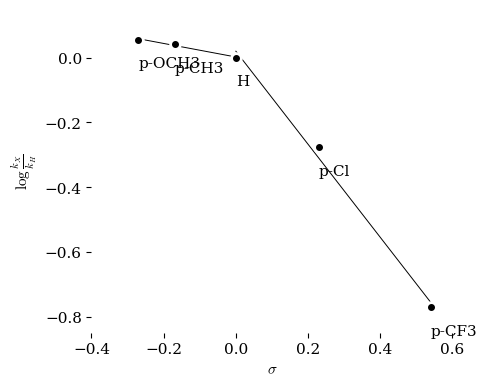

slope = -1.4369
intercept = 0.020
RSQ = 0.994216


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################


style_file = "tufte.mplstyle"
plt.style.use(github_styles_location + style_file + github_download)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################


    
#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="black", zorder=3)


if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(bot3x,bot3y)
    fity = linfit.slope * bot3x + linfit.intercept
    ax.plot(bot3x, fity, color='black', zorder=1, linewidth=0.7)
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")
    print()
    linfit = linregress(top3x,top3y)
    fity = linfit.slope * top3x + linfit.intercept
    ax.plot(top3x, fity, color='black', zorder=1, linewidth=0.7)
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")


    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{\frac{k_X}{k_H}}$", 
       xlabel=r"$\sigma$",
          xlim=[-.4,.6],                  
          ylim=[-.85,0.15]
      
      )

ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
############################
### Print labels on plot ###
############################

if True:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


#####################################
### Print the line fit parameters ###
#####################################

if True:         # Change to True to print a linear line fit results
    print(f"slope = {linfit.slope:0.4f}")
    print(f"intercept = {linfit.intercept:0.3f}")
    print(f"RSQ = {(linfit.rvalue**2):0.6f}")


## The Strange approximation of the $k_2/k_{-1}$ ratio.

the authors state that a more rigourous approach to evaluating the effect of substituents on the rate constant for ring closing, $k_2$, is to use the full rate equation. The observed rate constant is...

$$k_{obs} = \frac{k_1k_2}{k_{-1}+k_2}$$

First they note that when the sunstituent is OMe, we are at the extreme side of the region where $k_1$ is the rds. This means that $k_{obs}^{OMe} \approx k_1$. So if we take the ratio of $k_{obs}^{OMe}/k_{obs}^{R}$ we will get a term that gives us the ratio of $k_2/k_{-1}$. It is reasoned that both $k_{1}$ and $k_{-1}$ do not cha nge across the series as they are involved with the leaving group, not the substitued aromatic ring. So the $k_2/k_{-1}$ ratio should refelct the change in the value of $k_2$.

So let us state that...

$$ k_{obs}^{OMe} \approx k_1 \\ k_{obs}^{R} = \frac{k_1k_2^R}{k_{-1}+k_2^R}$$

so...

$$ \frac{k_{obs}^{OMe}}{k_{obs}^{R}}=\frac{k_1}{\frac{k_1k_2^R}{k_{-1}+k_2^R}}$$

$$ \frac{k_{obs}^{OMe}}{k_{obs}^{R}}=\frac{k_{-1}+k_2^R}{k_2^R}$$

$$ \frac{k_{obs}^{OMe}}{k_{obs}^{R}}=\frac{k_{-1}}{k_2^R}+1$$

We could get a value for $k_2/k_{-1}$ as follows...

$$ \frac{k_2^R}{k_{-1}} =  \frac{1}{\frac{k_{obs}^{OMe}}{k_{obs}^{R}}-1}$$

Lets do the math!

In [6]:
kOCH3 = df["rel. rate"]["p-OCH3"]

# We cant use the whole dataframe because this ewuation is undefined for when R=OMe
# It will explode if we apply it across the whole data series that includes OMe
# in theory k_obs^OMe will approach but never reach the value of k_1. But we have set 
# it to equal k_1. So let us take a new data frame and drop that records.

newDF = df.drop(["p-OCH3"],inplace = False)
newDF["ratio"] = 1 / (kOCH3 / newDF["rel. rate"] - 1)
newDF["log ratio"]=np.log10(newDF["ratio"])
print(newDF)

             rel. rate  math      relH      logk  sigma  s_plus  s_minus  \
Substituent                                                                
p-CF3             1.00     1  0.169492 -0.770852   0.54    0.61     0.65   
p-Cl              3.12     5  0.528814 -0.276697   0.23    0.11     0.19   
H                 5.90    41  1.000000  0.000000   0.00    0.00     0.00   
p-CH3             6.50    99  1.101695  0.042061  -0.17   -0.31    -0.17   

                 ratio  log ratio  
Substituent                        
p-CF3         0.175439  -0.755875  
p-Cl          0.871508  -0.059728  
H             7.375000   0.867762  
p-CH3        32.500000   1.511883  


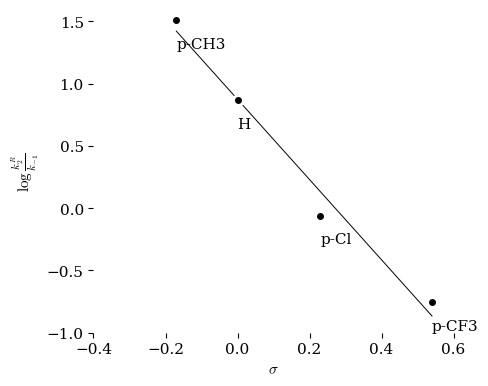

slope = -3.2235
intercept = 0.875
RSQ = 0.980885


In [7]:
x = newDF[sigma]
y = newDF["log ratio"]


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_styles_location + style_file + github_download)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################


    
#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="black", zorder=3)


if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(x,y)
    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='black', zorder=1, linewidth=0.7)


    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{\frac{k_2^R}{k_{-1}}}$", 
       xlabel=r"$\sigma$",
          xlim=[-.4,.6],                  
          ylim=[-1,1.6]
      
      )

ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
############################
### Print labels on plot ###
############################

if True:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

#fig.savefig("plotR.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


#####################################
### Print the line fit parameters ###
#####################################

if True:         # Change to True to print a linear line fit results
    print(f"slope = {linfit.slope:0.4f}")
    print(f"intercept = {linfit.intercept:0.3f}")
    print(f"RSQ = {(linfit.rvalue**2):0.6f}")
